In [1]:
! pip install instagramy
! pip install pandas
! pip install matplotlib

'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [2]:
from instagramy import *
import pandas as pd

In [4]:
user = InstagramUser("edumioficial", from_cache=True)
print(user.fullname)
print(str(user.number_of_followers) + ' seguidores.')

Edumi
1313 seguidores.


In [5]:
def analyze_user_recent_posts(username: str, *sessionid: str) -> dict:
    """ Functions return the required data to Analze Instagram user recent post """

    user = InstagramUser(username)
    posts = user.posts
    short_code = []
    likes = []
    comments = []
    for post in posts:
        short_code.append(post.shortcode)
        likes.append(post.likes)
        comments.append(post.comments)

    return {"Shortcode": short_code, "Likes": likes, "Comments": comments}

In [6]:
data = analyze_user_recent_posts("edumioficial")
df = pd.DataFrame(data)
print(df)

      Shortcode  Likes  Comments
0   CWWpxGbsIDn     53         2
1   CisUyBeOdiZ     33         0
2   CigH7LPP6dQ     38         5
3   CiaUehKDluc    291         2
4   CiQAf1KuGa4     68        12
5   CiI6wODhreE     40         6
6   Ch9_ebiO8Qu     68         1
7   Ch8DlCBvr_i     67        19
8   ChsWiYflU50     78        12
9   ChCzxrbui2J     44         0
10  Cgw5Oklujxc     62         4
11  CgcJrttu_tC     54         0


In [9]:
import datetime as dt 

today = dt.date.today()
df['Date'] = today
print(df)

      Shortcode  Likes  Comments        Date
0   CWWpxGbsIDn     53         2  2022-10-07
1   CisUyBeOdiZ     33         0  2022-10-07
2   CigH7LPP6dQ     38         5  2022-10-07
3   CiaUehKDluc    291         2  2022-10-07
4   CiQAf1KuGa4     68        12  2022-10-07
5   CiI6wODhreE     40         6  2022-10-07
6   Ch9_ebiO8Qu     68         1  2022-10-07
7   Ch8DlCBvr_i     67        19  2022-10-07
8   ChsWiYflU50     78        12  2022-10-07
9   ChCzxrbui2J     44         0  2022-10-07
10  Cgw5Oklujxc     62         4  2022-10-07
11  CgcJrttu_tC     54         0  2022-10-07


In [10]:
df.to_csv('edumi_instagram_20221007', index=False)

In [38]:
import os

pdList = []
pdList2 = []

for i in range(2022, 2023):
  for j in range(1, 13):
      for k in range(1, 32):
        pasta_arquivo = f"edumi_instagram_{i}{j:02d}{k:02d}.csv"
        if os.path.exists(pasta_arquivo) == True:
            #print('Arquivo reconhecido.')
            with open(pasta_arquivo, 'r', encoding='UTF-8') as file:
                df = pd.read_csv(file, sep = ',')
                pdList.append(df)
                #print('Arquivo adicionado.')

df_final = pd.concat(pdList, axis=0, ignore_index=True)
print('DataFrame inicial criado.')
print(df_final.head())

DataFrame criado.
     Shortcode  Likes  Comments        Date
0  CWWpxGbsIDn     53         2  2022-10-06
1  CisUyBeOdiZ     33         0  2022-10-06
2  CigH7LPP6dQ     38         5  2022-10-06
3  CiaUehKDluc    290         2  2022-10-06
4  CiQAf1KuGa4     68        12  2022-10-06


In [77]:
likes_gained_dict = {}
comments_gained_dict = {}

for i in df_final['Shortcode']:
    df_analysis = df_final[df_final['Shortcode'] == i]
    likes_gained = df_analysis.iloc[-1, 1] - df_analysis.iloc[0, 1]
    likes_gained_dict[i] = likes_gained
    comments_gained = df_analysis.iloc[-1, 2] - df_analysis.iloc[0, 2]
    comments_gained_dict[i] = comments_gained

df_likes = pd.DataFrame.from_dict(likes_gained_dict, orient='index')
df_likes.columns = ['likes_gained']
df_comments = pd.DataFrame.from_dict(comments_gained_dict, orient='index')
df_comments.columns = ['comments_gained']

print(df_likes.head())
print(df_comments.head())

             likes_gained
CWWpxGbsIDn             0
CisUyBeOdiZ             0
CigH7LPP6dQ             0
CiaUehKDluc             1
CiQAf1KuGa4             0
             comments_gained
CWWpxGbsIDn                0
CisUyBeOdiZ                0
CigH7LPP6dQ                0
CiaUehKDluc                0
CiQAf1KuGa4                0


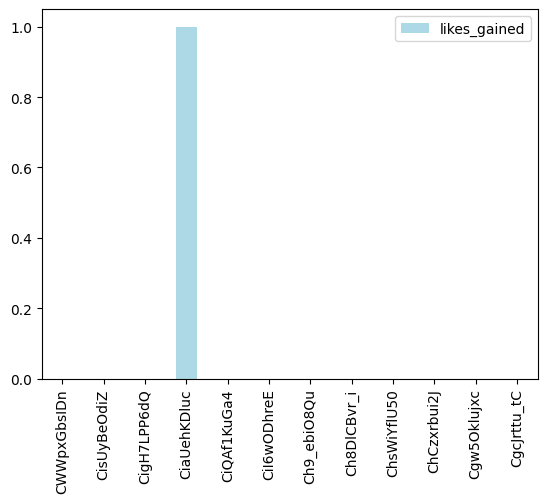

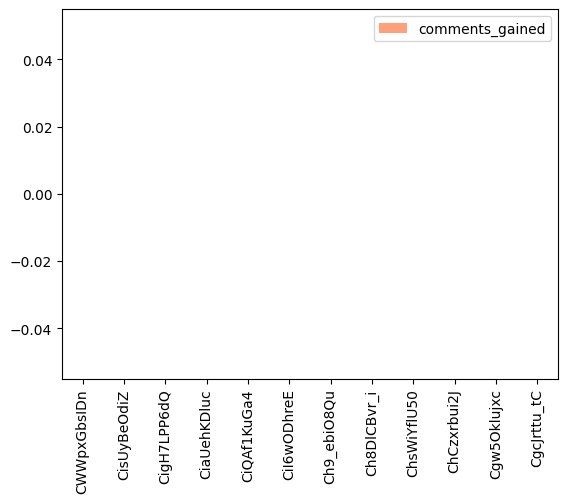

In [88]:
import matplotlib

df_likes.plot.bar(color='lightblue')

comments_chart = df_comments.plot.bar(color='lightsalmon')

<AxesSubplot: >

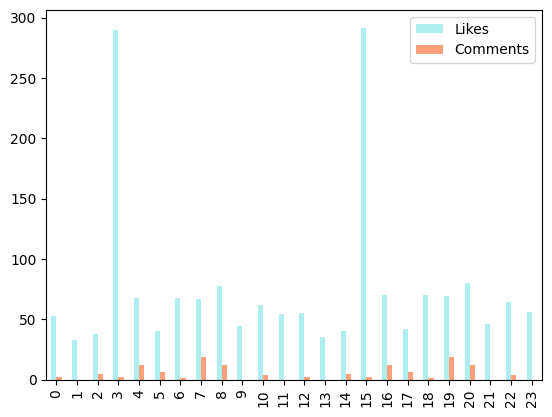

In [59]:
import matplotlib

color_dict={'Likes': 'paleturquoise', 'Comments': 'lightsalmon'}
df3.plot(color=color_dict)


<AxesSubplot: >

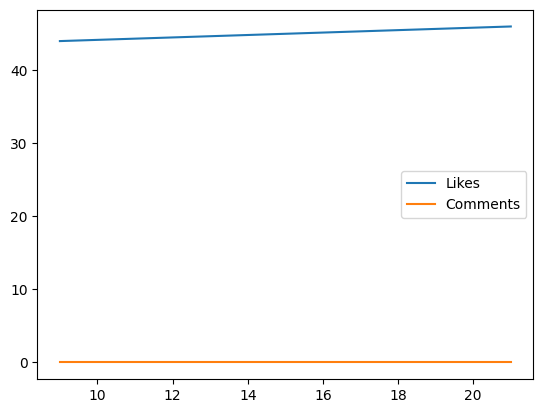

In [62]:
df_analysis.plot()